### Applying Code From

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Imports
# os - for saving and loading files
# json - to work with json files
# math - to round up results
# time - to add a short pause to not overwhelm the server
import os, json, math, time

# to make yelpapi calls
from yelpapi import YelpAPI

# progress bar from tqdm_notebook
from tqdm.notebook import tqdm_notebook

### Load Credentials and Create Yelp API Object

In [2]:
# Load API Credentials
# use your own credentials
with open('/Users/rdrlr/.secret/yelp_api.json') as f:   #use your path here!
    login = json.load(f)
login.keys()

dict_keys(['client-id', 'api-key'])

In [3]:
# Create an instance with your key
# Define Search
# This will use the (YelpAPI) package
yelp = YelpAPI(login['api-key'], timeout_s=5.0)
yelp

___________________

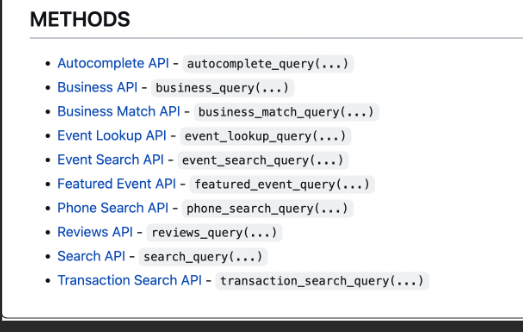

In [4]:
help(yelp.search_query)

Help on method search_query in module yelpapi.yelpapi:

search_query(**kwargs) method of yelpapi.yelpapi.YelpAPI instance
    Query the Yelp Search API.
    
    documentation: https://www.yelp.com/developers/documentation/v3/business_search
    
    required parameters:
        * one of either:
            * location - text specifying a location to search for
            * latitude and longitude



### Define Search Terms and File Paths

In [5]:
# set our API call parameters and filename before the first call
# Got from explore fusion/Yelp Fusion Endpoints list/ Bussines Search Description
# under the description it tells you that you can find the business location, click on the path link to see what query params we an use
# for term this is to specify what i am looking for, you can type food,restaurants, business name, starbucks, etc. 
location = 'San Antonio, TX'
term = 'Ramen'

In [6]:
# This will extract something from previous cell.  
# In this case we extract "location on split on (comma aka ',') where [0] means the first value"
location.split(',')[0]

'San Antonio'

In [7]:
# This will extract something from previous cell.  
# In this case we extract "location on split on (comma aka ',') where [0] means the first value"
# To extract just Ramen 
term.split()[0]

'Ramen'

In [8]:
# This will extract something from previous cell.  
# In this case we extract "location on split on (comma aka ',') where [0] means the first value"
# [1] would be for TX after the ',' in this case 
location.split(',')[1]

' TX'

In [9]:
## Specify folder for saving data
# We took (location.split(',')[1])) from previous cell you will see it below which will input the San Antonio section
# after the [0] you will see -{term} which will tie in Ramen
# Then you can go to Home tab and it will add this file to the Data folder 
FOLDER = 'Data/'

os.makedirs(FOLDER, exist_ok = True)

# Specifying JSON_FILE filename (can include a folder)
JSON_FILE = FOLDER+f"{location.split(',')[0]}-{term}.json"

In [10]:
JSON_FILE

'Data/San Antonio-Ramen.json'

### Check if Json File exists and Create it if it doesn't

In [11]:
## Check if JSON_FILE exists
# Now its going to check my Data folder from the home tab to see if it exists
# If JSON_FILE exist is (=False) then it will create the file and you will get a print out that says "not  foun. Saving empty list to file"
# If JSON_FILE exist is (=True) then it will print out already exists 

file_exists = os.path.isfile(JSON_FILE)

## If it does not exist: 
if file_exists == False:    
    ## CREATE ANY NEEDED FOLDERS
    # Get the Folder Name only
    folder = os.path.dirname(JSON_FILE)
    
    ## If JSON folder name is not empty:
    if len(folder)>0:
        # create the folder
        os.makedirs(folder, exist_ok = True)
        
        
    ## INFORM USER AND SAVE EMPTY LIST
    print(f"[i] {JSON_FILE} not found. Saving empty list to file.")

    
    ## save the first page of results
    with open(JSON_FILE, 'w') as f:
          json.dump([], f)
        
## If it exists, inform user
else:
    print(f"[i] {JSON_FILE} already exists.")

[i] Data/San Antonio-Ramen.json already exists.


In [12]:
os.path.isfile(JSON_FILE)

True

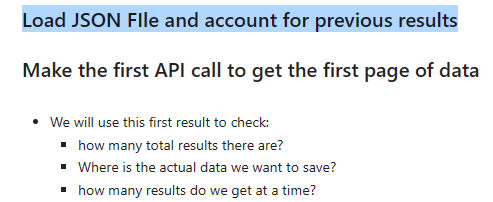

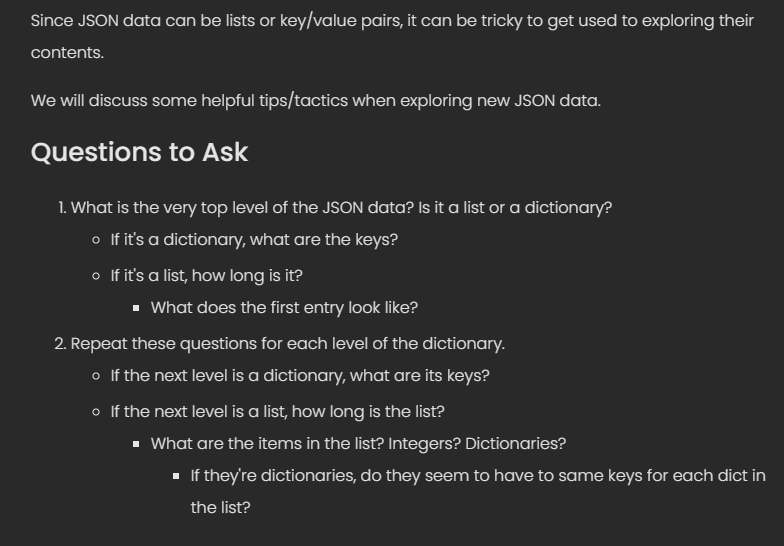

In [13]:
# perform first API call through search_query
# use our yelp_api variable's (search_query) method to perform our API call we got (search_query) from Yelp fusion
results = yelp.search_query(term = term, location = location)

In [14]:
# checking type of first query and its a dictionary 
# #1 of Questions to ask list above "What is the very top level of the JSON data? Is it a list or a dictionary?"
type(results)

dict

In [15]:
# checking length of this dictionary
# #1 of Questions to ask list above "If it's a dictionary, what are the keys?""
# this tells us there are 3 keys in this dictionary
len(results)

3

In [16]:
# checking what are the keys in this dictionary
# #1 of Questions to ask list above "If it's a dictionary, what are the keys?""
results.keys()

dict_keys(['businesses', 'total', 'region'])

# Check what each key represents
### still part of # 1 of Questions to ask list above "If it's a dictionary, what are the keys?"

### -total

In [17]:
# this total key means there are 228 records total with the total API key
results['total']

228

### -region

In [18]:
# this region key will let us know the longitude and latitude
results['region']

{'center': {'longitude': -98.514404296875, 'latitude': 29.494438307483204}}

### -businesses

In [19]:
# this business key will let us know how many local businesses are there in San Antonio that are serving Ramen
# the results turn up different records for each business
# visually you can see id, alias, name, url, is_closed, location, rating, etc..... 
results['businesses']

[{'id': 'zrtmpPQZoarKm1076yZ_cg',
  'alias': 'yippon-ramen-san-antonio',
  'name': 'Yippon Ramen',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/OmUDZeAXbFaYF8hxsDcKVQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/yippon-ramen-san-antonio?adjust_creative=Iiwi3R8hbPlevZU2R47PTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=Iiwi3R8hbPlevZU2R47PTg',
  'review_count': 98,
  'categories': [{'alias': 'sushi', 'title': 'Sushi Bars'},
   {'alias': 'ramen', 'title': 'Ramen'}],
  'rating': 4.5,
  'coordinates': {'latitude': 29.492627467327885,
   'longitude': -98.43196037054842},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '1518 Austin Hwy',
   'address2': 'Ste 18',
   'address3': None,
   'city': 'San Antonio',
   'zip_code': '78218',
   'country': 'US',
   'state': 'TX',
   'display_address': ['1518 Austin Hwy', 'Ste 18', 'San Antonio, TX 78218']},
  'phone': '+12102367188',
  'display_phone': '(210) 236-7188',
  'dista

In [20]:
## How many results total?
## the reults go up to 19 so this means there are 20 on this 
## first part pd.DataFrame means its saving everying into a Dataframe to read with pandas format below (sometime things are not arranged well)
## results only give you 20 even though when we ran "total" earlier it said 228. 
# results was our 1st API call and they only contain 20 as Yelp allows  
pd.DataFrame(results['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,zrtmpPQZoarKm1076yZ_cg,yippon-ramen-san-antonio,Yippon Ramen,https://s3-media1.fl.yelpcdn.com/bphoto/OmUDZe...,False,https://www.yelp.com/biz/yippon-ramen-san-anto...,98,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.5,"{'latitude': 29.492627467327885, 'longitude': ...",[],$$,"{'address1': '1518 Austin Hwy', 'address2': 'S...",+12102367188,(210) 236-7188,7981.892734
1,tGhv0BVoQgqq3mIE1DlaHA,jinya-ramen-bar-san-antonio-san-antonio-4,JINYA Ramen Bar - San Antonio,https://s3-media2.fl.yelpcdn.com/bphoto/iMLB5b...,False,https://www.yelp.com/biz/jinya-ramen-bar-san-a...,154,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 29.592871775150815, 'longitude': ...","[pickup, delivery]",$$,"{'address1': '5311 N Loop 1604 W', 'address2':...",+12102512519,(210) 251-2519,13179.152799
2,0KczvSbrDfq9lHm7ZtF2rQ,piranha-izakaya-san-antonio-3,Piranha Izakaya,https://s3-media1.fl.yelpcdn.com/bphoto/ql-JIa...,False,https://www.yelp.com/biz/piranha-izakaya-san-a...,469,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 29.49438, 'longitude': -98.479}","[delivery, restaurant_reservation]",$$,"{'address1': '260 E Basse Rd', 'address2': 'St...",+12108221088,(210) 822-1088,3439.453518
3,TXnOV93w8mHd7oqOC2Jy0w,mr-ramen-no-title,Mr.Ramen,https://s3-media2.fl.yelpcdn.com/bphoto/LvEE51...,False,https://www.yelp.com/biz/mr-ramen-no-title?adj...,23,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 29.5888624296923, 'longitude': -9...",[restaurant_reservation],NaN,"{'address1': '16111 San Pedro Ave', 'address2'...",+12103621126,(210) 362-1126,11157.245215
4,8aUAFZSENBgdC17hPpKp5g,wild-goji-restaurant-and-bar-san-antonio-3,Wild Goji Restaurant & Bar,https://s3-media1.fl.yelpcdn.com/bphoto/KApU2Q...,False,https://www.yelp.com/biz/wild-goji-restaurant-...,1200,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",4.5,"{'latitude': 29.52242, 'longitude': -98.50648}","[delivery, restaurant_reservation]",$$,"{'address1': '7115 Blanco Rd', 'address2': 'St...",+12102770638,(210) 277-0638,3231.701220
5,1DRoOt6weCYLuMrsLProvA,bakudan-ramen-san-antonio,Bakudan Ramen,https://s3-media2.fl.yelpcdn.com/bphoto/Hcxewl...,False,https://www.yelp.com/biz/bakudan-ramen-san-ant...,507,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,"{'latitude': 29.610271, 'longitude': -98.598683}","[pickup, delivery]",$$,"{'address1': '17619 La Cantera Pkwy', 'address...",+12102578080,(210) 257-8080,15243.110026
6,QgWzBUjAweybuj4bxxJ1RA,hero-s-ramen-x-sushi-san-antonio,Hero’s Ramen X Sushi,https://s3-media4.fl.yelpcdn.com/bphoto/_kPM8a...,False,https://www.yelp.com/biz/hero-s-ramen-x-sushi-...,249,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.5,"{'latitude': 29.5653783379701, 'longitude': -9...","[pickup, delivery]",$$,"{'address1': '13444 West Ave', 'address2': 'St...",+12104814950,(210) 481-4950,8248.682304
7,mBcmNWS1k9p2q0G-NDSR0A,kimura-san-antonio-2,Kimura,https://s3-media4.fl.yelpcdn.com/bphoto/NMR8pI...,False,https://www.yelp.com/biz/kimura-san-antonio-2?...,906,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",3.5,"{'latitude': 29.435291841765, 'longitude': -98...",[delivery],$$,"{'address1': '1017 N Flores St', 'address2': '...",+12104440702,(210) 444-0702,6711.060656
8,BUUhBk-4Xbfno8hRNIm9Hg,kuriya-san-antonio,Kuriya,https://s3-media2.fl.yelpcdn.com/bphoto/S4UBJN...,False,https://www.yelp.com/biz/kuriya-san-antonio?ad...,107,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.5,"{'latitude': 29.41828, 'longitude': -98.47606}",[],$$,"{'address1': '302 Montana St', 'address2': '',...",+12105980496,(210) 598-0496,9238.368315
9,RSb0oNJmAWmxGYV-uL8j2A,yokai-japanese-and-asian-restaurant-san-antonio-2,Yokai Japanese & Asian Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/_eEPK4...,False,https://www.yelp.com/biz/yokai-japanese-and-as...,111,"[{'alias': 'asianfusion', 'title': 'Asian Fusi..."

- Where is the actual data we want to save?

In [21]:
## How many did we get the details for?
# this will save the date we just viewed we are finding the lenghth of it 
# and keeping it as a result per page so everytime we perform the call it will give up 20 records 
results_per_page = len(results['businesses'])
results_per_page

20

In [22]:
# Calculate how many pages of results needed to cover the total_results
# round up the results to 12 in this case, this means we need to perform 12 API calls to get all the 288 (total) local businesses
(results['total'])/ results_per_page

11.4

In [23]:
# Use math.ceil to round up for the total number of pages of results.
# this rounded the 11.4 to 12
n_pages = math.ceil((results['total'])/ results_per_page)
n_pages

12

In [24]:
#  tqdm gives you a status bar
# range(1,n_pages+1)) this is loop to previous cell which means it will perform the loop 12 time
# you will see a try and except in (green letters).  The try block will try that whole block but
# if any execption/error occurs it will go to the (except block in green) and it will print there is a error
# the try block does the following (it loads the JSON_FIle and then it will store into the previous_results
# then you will find the len (length) of result 
# then we will move on to next API call and the offet will start from next set up numbers 21-40 using offset (n_results+1) then it will keeping
# looping sets until done, next loop is 41-60.  On that same offset section it will save the offset results to use on append section. 
# append section will use results on businesses and will store into the previous_results we set up earlier with the .extend
# use .extend this means it will store a bunch of records in a sequence () you need to use .extend instead of append
# then we will write into the JSON_FILE

for i in tqdm_notebook(range(1,n_pages+1)):
    ## The block of code we want to TRY to run
    try:
        
        time.sleep(.2)
        
        ## Read in results in progress file and check the length
        with open(JSON_FILE, 'r') as f:
            previous_results = json.load(f)
        
        ## save number of results to use as offset
        n_results = len(previous_results)
        
        
        ## use n_results as the OFFSET 
        results = yelp.search_query(location = location, term = term,
                                   offset = n_results+1)

        ## append new results and save to file
        previous_results.extend(results['businesses'])
        
        with open(JSON_FILE, 'w') as f:
            json.dump(previous_results, f)

            
    ## What to do if we get an error/exception.
    except Exception as e:
        print(' [!] ERROR', e)

  0%|          | 0/12 [00:00<?, ?it/s]

- you can see that 12/12 pages were extracted on percentage bar

- if you see under the percentage bar error message (see screen shot example) this means there was a error and because of the exception we set up in our function it didn't stop the extracting the data which would loose the data if there wasn't this exception

# Open the Final JSON File with Pandas

In [25]:
df = pd.read_json(JSON_FILE)

In [26]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,tGhv0BVoQgqq3mIE1DlaHA,jinya-ramen-bar-san-antonio-san-antonio-4,JINYA Ramen Bar - San Antonio,https://s3-media2.fl.yelpcdn.com/bphoto/iMLB5b...,False,https://www.yelp.com/biz/jinya-ramen-bar-san-a...,154,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 29.592871775150815, 'longitude': ...","[delivery, pickup]",$$,"{'address1': '5311 N Loop 1604 W', 'address2':...",+12102512519,(210) 251-2519,13179.152799
1,0KczvSbrDfq9lHm7ZtF2rQ,piranha-izakaya-san-antonio-3,Piranha Izakaya,https://s3-media1.fl.yelpcdn.com/bphoto/ql-JIa...,False,https://www.yelp.com/biz/piranha-izakaya-san-a...,469,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 29.49438, 'longitude': -98.479}","[restaurant_reservation, delivery]",$$,"{'address1': '260 E Basse Rd', 'address2': 'St...",+12108221088,(210) 822-1088,3439.453518
2,TXnOV93w8mHd7oqOC2Jy0w,mr-ramen-no-title,Mr.Ramen,https://s3-media2.fl.yelpcdn.com/bphoto/LvEE51...,False,https://www.yelp.com/biz/mr-ramen-no-title?adj...,23,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...",4.5,"{'latitude': 29.5888624296923, 'longitude': -9...",[restaurant_reservation],NaN,"{'address1': '16111 San Pedro Ave', 'address2'...",+12103621126,(210) 362-1126,11157.245215
3,8aUAFZSENBgdC17hPpKp5g,wild-goji-restaurant-and-bar-san-antonio-3,Wild Goji Restaurant & Bar,https://s3-media1.fl.yelpcdn.com/bphoto/KApU2Q...,False,https://www.yelp.com/biz/wild-goji-restaurant-...,1200,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",4.5,"{'latitude': 29.52242, 'longitude': -98.50648}","[restaurant_reservation, delivery]",$$,"{'address1': '7115 Blanco Rd', 'address2': 'St...",+12102770638,(210) 277-0638,3231.701220
4,1DRoOt6weCYLuMrsLProvA,bakudan-ramen-san-antonio,Bakudan Ramen,https://s3-media2.fl.yelpcdn.com/bphoto/Hcxewl...,False,https://www.yelp.com/biz/bakudan-ramen-san-ant...,507,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,"{'latitude': 29.610271, 'longitude': -98.598683}","[delivery, pickup]",$$,"{'address1': '17619 La Cantera Pkwy', 'address...",+12102578080,(210) 257-8080,15243.110026


In [27]:
# here you can see that there are only 227 but the total should be 228 this means something did transfer over and missing
# an see price has 181 so thats missing data too
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             227 non-null    object 
 1   alias          227 non-null    object 
 2   name           227 non-null    object 
 3   image_url      227 non-null    object 
 4   is_closed      227 non-null    bool   
 5   url            227 non-null    object 
 6   review_count   227 non-null    int64  
 7   categories     227 non-null    object 
 8   rating         227 non-null    float64
 9   coordinates    227 non-null    object 
 10  transactions   227 non-null    object 
 11  price          181 non-null    object 
 12  location       227 non-null    object 
 13  phone          227 non-null    object 
 14  display_phone  227 non-null    object 
 15  distance       227 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 26.9+ KB


In [28]:
## convert the filename to a .csv.gz
csv_file = JSON_FILE.replace('.json','.csv.gz')
csv_file

'Data/San Antonio-Ramen.csv.gz'

In [29]:
## Save it as a compressed csv (to save space)
df.to_csv(csv_file, compression = 'gzip', index = False)

____

# Extra work below (comparing filesize with os module's os.path.getsize)

In [30]:
# this will show you how much space you are saving from converting from json to csv
size_json = os.path.getsize(JSON_FILE)
size_csv_gz = os.path.getsize(JSON_FILE.replace('.json','.csv.gz'))

print(f'JSON FILE: {size_json:,} Bytes')
print(f'CSV.GZ FILE: {size_csv_gz:,} Bytes')

print(f'the csv.gz is {size_json/size_csv_gz} times smaller!')

JSON FILE: 227,495 Bytes
CSV.GZ FILE: 33,043 Bytes
the csv.gz is 6.884816753926701 times smaller!
